In [13]:
df <- read.csv("credit_risk_dataset.csv")

colnames(df)


[1] "person_age"                 "person_income"             
 [3] "person_home_ownership"      "person_emp_length"         
 [5] "loan_intent"                "loan_grade"                
 [7] "loan_amnt"                  "loan_int_rate"             
 [9] "loan_status"                "loan_percent_income"       
[11] "cb_person_default_on_file"  "cb_person_cred_hist_length"

## Monto de prestamos para personas que han pagado

# 1. Veamos si el monto de prestamos se distribuye normalmente

### Estadisticas descriptivas que nos ayudan a entender la distribucion de los datos

In [28]:
df_Y <- subset(df, cb_person_default_on_file == 'Y')

media_Y <- mean(df_Y$loan_amnt)
mediana_Y <- median(df_Y$loan_amnt)
varianza_Y <- var(df_Y$loan_amnt)
desv_est_Y <- sd(df_Y$loan_amnt)
iqr_Y <- IQR(df_Y$loan_amnt)

cat("Media =", media_Y, "\n")
cat("Mediana = ", mediana_Y, "\n")
cat("Varianza = ", varianza_Y, "\n")
cat("Desviacion estandar = ", desv_est_Y, "\n")
cat("Rango intercuantílico = ", iqr_Y)


Media = 10123.36 
Mediana =  8400 
Varianza =  46970887 
Desviacion estandar =  6853.531 
Rango intercuantílico =  9400

In [15]:
library(moments) # Calculo de curtosis y asimetria

curt_Y <- kurtosis(df_Y$loan_amnt)
asimetria_muestral_Y <- skewness(df_Y$loan_amnt)

cat("Curtosis = ", curt_Y, "\n")
cat("Asimetria muestral = ", asimetria_muestral_Y)

Curtosis =  3.773135 
Asimetria muestral =  1.051963

### Graficos para entender la distribucion de los datos

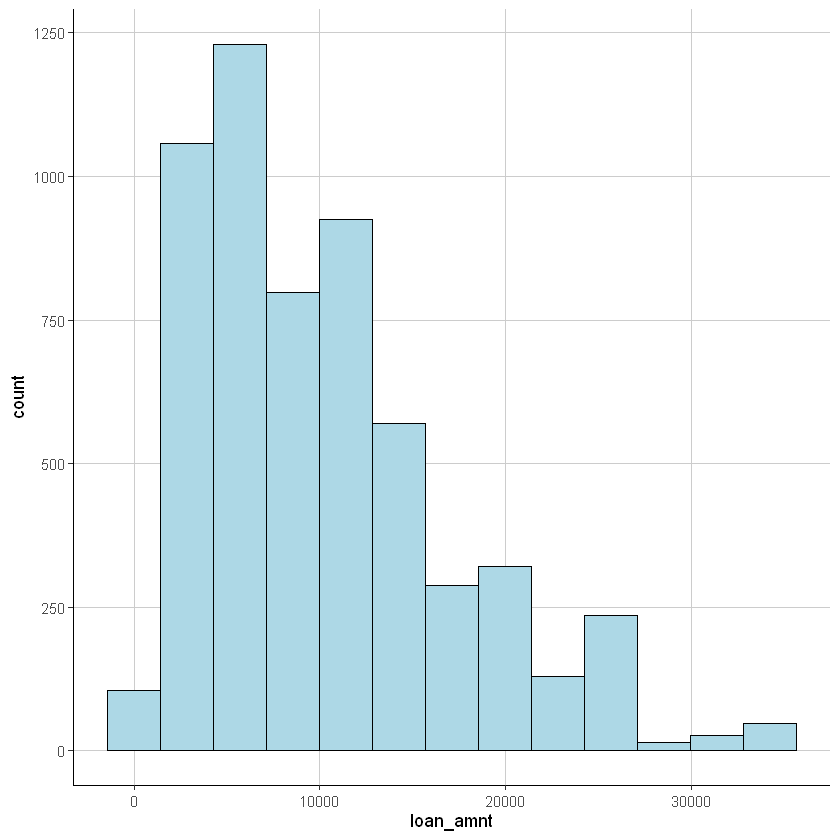

In [16]:
library(ggplot2)

hist_Y <- ggplot(df_Y, aes(x = loan_amnt)) +
  geom_histogram(bins = 13, fill = "lightblue", color = "black") +  # Color de barras y borde
  theme_classic() +  # Aplicar un tema clasico (con fondo blanco)
  theme(panel.grid.major = element_line(color = "gray80", size = 0.5)) # Agregar cuadricula

hist_Y


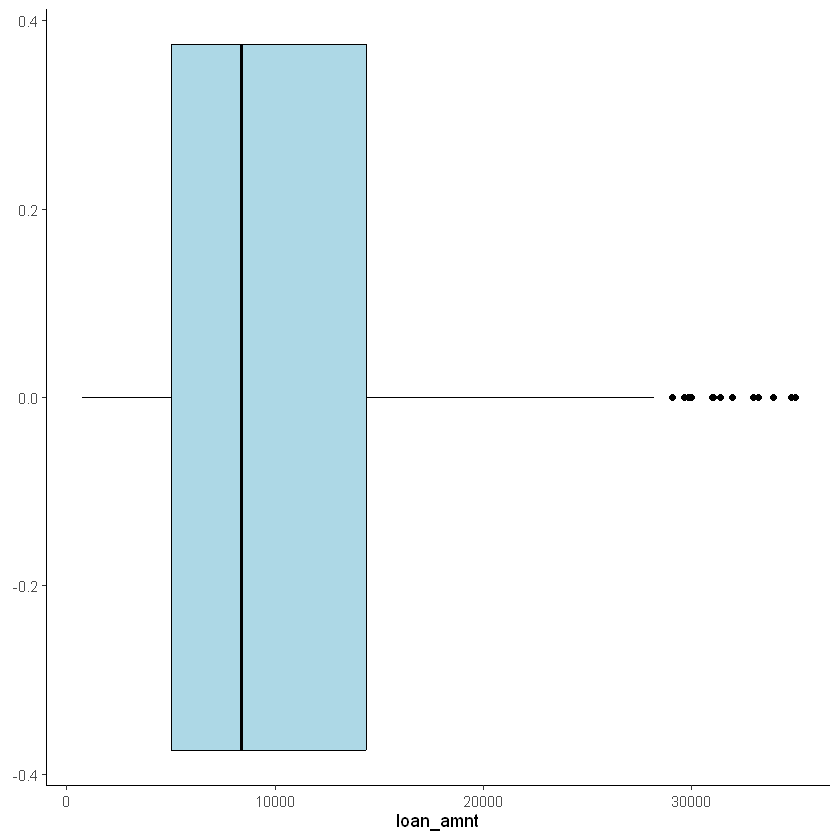

In [17]:
boxp_Y <- ggplot(df_Y, aes(x = loan_amnt)) +
  geom_boxplot(fill = "lightblue", color= "black") +
  theme_classic()

boxp_Y

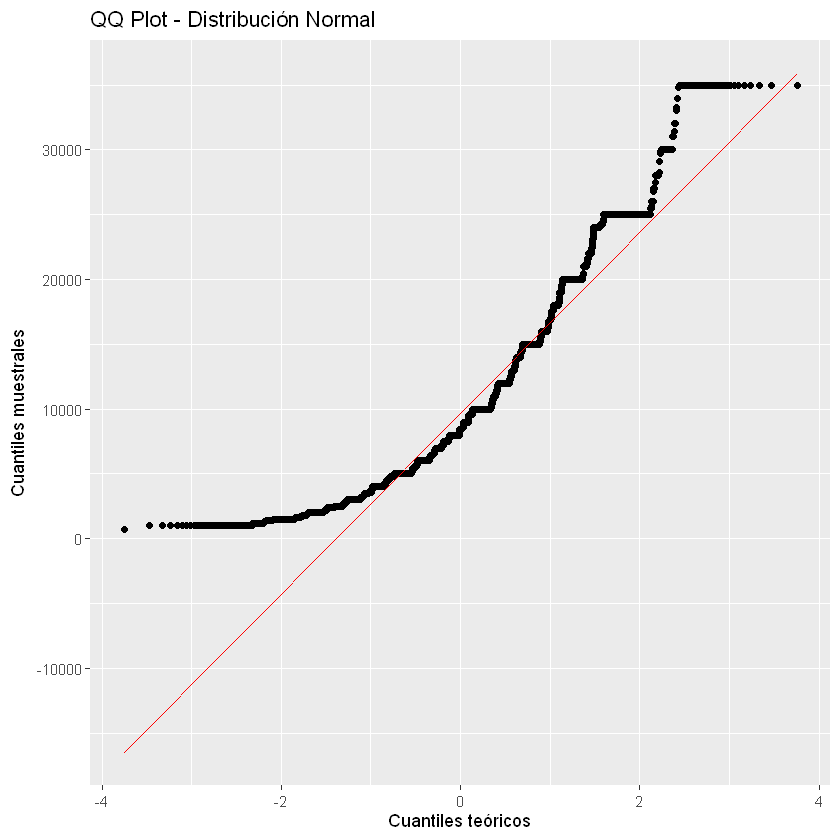

In [18]:
qqnormal_Y <- ggplot(df_Y, aes(sample = loan_amnt)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  ggtitle("QQ Plot - Distribución Normal") +
  xlab("Cuantiles teóricos") +
  ylab("Cuantiles muestrales")

qqnormal_Y

## Monto de prestamos para personas que no han pagado

### Estadisticas descriptivas que nos ayudan a entender la distribucion de los datos

In [27]:
df_N <- subset(df, cb_person_default_on_file == 'N')

media_N <- mean(df_N$loan_amnt)
mediana_N <- median(df_N$loan_amnt)
varianza_N <- var(df_N$loan_amnt)
desv_est_N <- sd(df_N$loan_amnt)
iqr_N <- IQR(df_N$loan_amnt)

cat("Media =", media_Y, "\n")
cat("Mediana = ", mediana_Y, "\n")
cat("Varianza = ", varianza_Y, "\n")
cat("Desviacion estandar = ", desv_est_N, "\n")
cat("Rango intercuantílico = ", iqr_Y)

Media = 10123.36 
Mediana =  8400 
Varianza =  46970887 
Desviacion estandar =  6196.561 
Rango intercuantílico =  9400

In [20]:
library(moments) # Calculo de curtosis y asimetria

curt_N <- kurtosis(df_N$loan_amnt)
asimetria_muestral_N <- skewness(df_N$loan_amnt)

cat("Curtosis = ", curt_N, "\n")
cat("Asimetria muestral = ", asimetria_muestral_N)

Curtosis =  4.581604 
Asimetria muestral =  1.220372

### Graficos para entender la distribucion de los datos


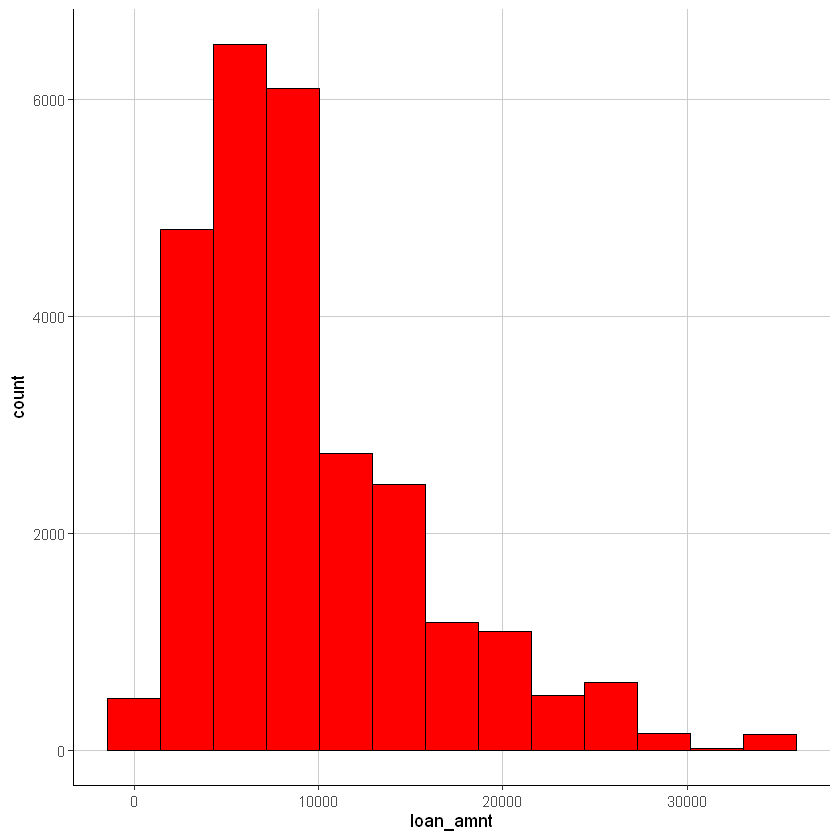

In [21]:
hist_N <- ggplot(df_N, aes(x = loan_amnt)) +
  geom_histogram(bins = 13, fill = "red", color = "black") +  # Color de barras y borde
  theme_classic() +  # Aplicar un tema clasico (con fondo blanco)
  theme(panel.grid.major = element_line(color = "gray80", size = 0.5)) # Agregar cuadricula

hist_N

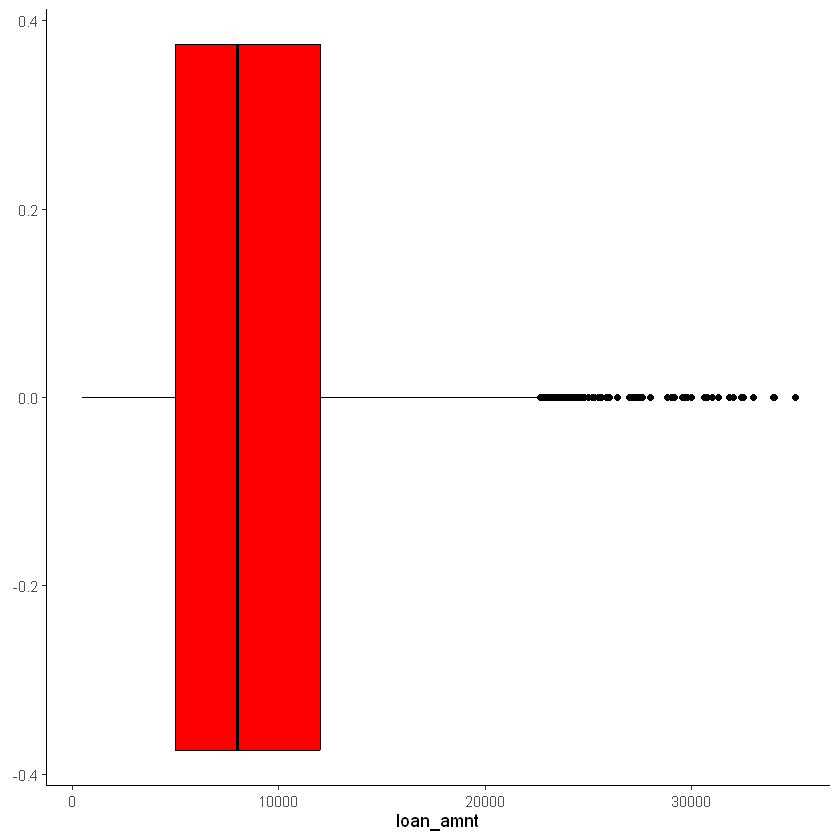

In [22]:
boxp_N <- ggplot(df_N, aes(x = loan_amnt)) +
  geom_boxplot(fill = "red", color= "black") +
  theme_classic()

boxp_N

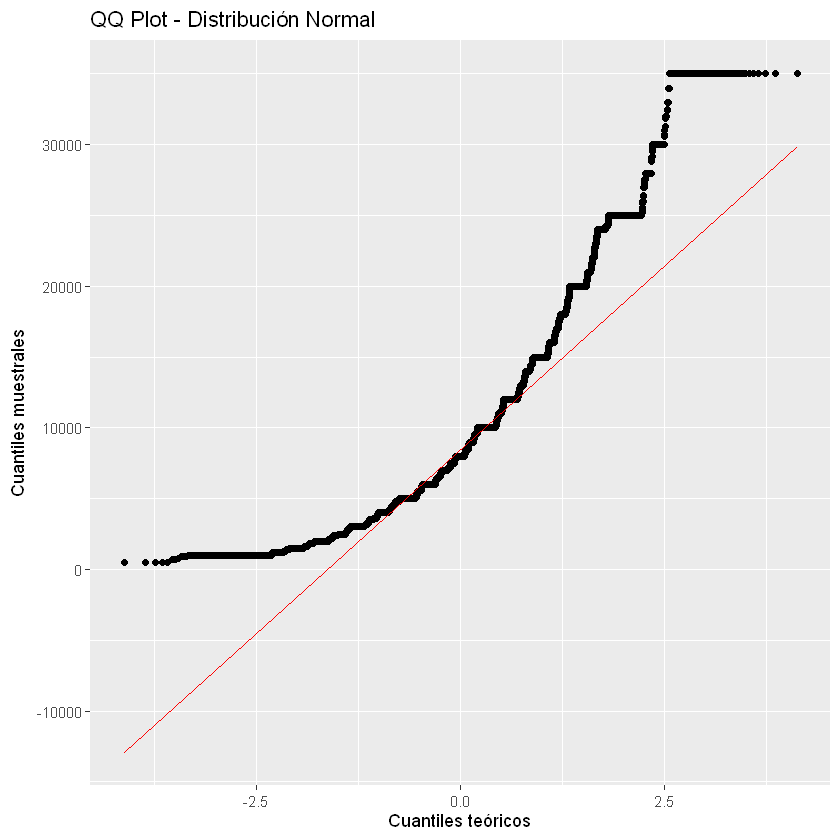

In [23]:
qqnormal_N <- ggplot(df_N, aes(sample = loan_amnt)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  ggtitle("QQ Plot - Distribución Normal") +
  xlab("Cuantiles teóricos") +
  ylab("Cuantiles muestrales")

qqnormal_N

# 2. ¿La media para ambas categorias es igual?

Generemos un intervalo de confianza para la diferencia de las medias, en donde usaré el siguiente intervalo dado que el tamaño de la muestra es lo suficientemente grande para poder usar el teorema del límite central:
$$\left( (\bar{X} - \bar{Y}) - Z_{\frac{\alpha}{2}} \sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}, (\bar{X} - \bar{Y}) + Z_{\frac{\alpha}{2}} \sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}} \right)$$

En este caso, $\bar{X}$ y $\bar{Y}$ son las medias de las muestras de personas que han pagado y no han pagado, $S_x$ y $S_y$ son las desviaciones estándar de las muestras de personas que han pagado y no han pagado, $n_x$ y $n_y$ son los tamaños de las muestras de personas que han pagado y no han pagado, y $Z_{\frac{\alpha}{2}}$ es el valor crítico de la distribución normal estándar para un nivel de confianza del 95%.

In [24]:
dif_medias <- media_Y - media_N

nY <- length(df_Y$loan_amnt)
nN <- length(df_N$loan_amnt)

Z <- qnorm(0.975)

error <- Z * sqrt(varianza_Y/nY + varianza_N/nN)

intervalo <- c(dif_medias - error, dif_medias + error)

cat("Intervalo de confianza para la diferencia de las medias: (", intervalo[1], ", ", intervalo[2], ")")


Intervalo de confianza para la diferencia de las medias: ( 456.1993 ,  840.4078 )

# 3. Pruebas de hipótesis con un nivel de significancia del 5%

Para comprobar el resultado anterior, hagamos una prueba de hipótesis donde:

$H_0: \mu_Y - \mu_N = 0$

$H_1: \mu_Y - \mu_N \neq 0$

Calculamos el estadístico de prueba:
$$t = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}} \; \sim \; t_{\nu}$$

donde $\nu$ es el número de grados de libertad, que se calcula como:

$$\nu \approx \frac{\left(\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}\right)^2}{\frac{(S_x^2/n_x)^2}{n_x-1} + \frac{(S_y^2/n_y)^2}{n_y-1}}$$

y con una region de rechazo de la forma:

$$R = \{t: |t| > t_{\frac{\alpha}{2}, \nu}\}$$


In [25]:
nY <- length(df_Y$loan_amnt)
nN <- length(df_N$loan_amnt)

t_estadistico <- (media_Y - media_N) / sqrt(varianza_Y/nY + varianza_N/nN)

grados_libertad <- round(((varianza_Y/nY + varianza_N/nN)^2) / ((varianza_Y/nY)^2/(nY-1) + (varianza_N/nN)^2/(nN-1)))

t_critico <- qt(0.975, grados_libertad)

if (abs(t_estadistico) > t_critico) {
  cat("Rechazamos la hipótesis nula. La diferencia entre las medias es significativa.")
} else {
  cat("No rechazamos la hipótesis nula. La diferencia entre las medias no es significativa.")
}

Rechazamos la hipótesis nula. La diferencia entre las medias es significativa.